# Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Viewing datasets
train.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
print(train.shape)

(1628, 29)


In [5]:
test.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [6]:
print(test.shape)

(470, 28)


In [7]:
print(train.isna().sum())

Id                         0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64


In [8]:
print(test.isna().sum())

Id                         0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64


In [9]:
ytrain=train["Attrition"]
train1=train.drop(["Attrition"],axis=1)
train1.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
1,2,36,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
2,3,55,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
3,4,39,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
4,5,37,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1


In [10]:
list(train.select_dtypes(['object']).columns)

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [11]:
list(test.select_dtypes(['object']).columns)

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

# Exploratory Data Analysis

In [12]:
train.Attrition.value_counts(normalize=False)

Attrition
0    843
1    785
Name: count, dtype: int64

According to the train data 52% employees did not leave the company, while 48% employees left the company.

In [13]:
print(train[train.Attrition==0]["MonthlyIncome"].mean())
print(train[train.Attrition==1]["MonthlyIncome"].mean())

6792.187425860024
4704.484076433121


Here the mean salary of employess who left company is 4704 and for employees who did not leave the company is 6792.

In [14]:
#for analyzing the job role in each department

In [15]:
for dept in train['Department'].unique():
    print('\n', dept, ':')
    print(train[train['Department']==dept]['JobRole'].value_counts())


 Research & Development :
JobRole
Research Scientist           341
Laboratory Technician        310
Manufacturing Director       121
Healthcare Representative    110
Manager                       50
Research Director             47
Name: count, dtype: int64

 Sales :
JobRole
Sales Executive         365
Sales Representative    172
Manager                  31
Name: count, dtype: int64

 Human Resources :
JobRole
Human Resources    72
Manager             9
Name: count, dtype: int64


In [16]:
#Data Visualiization

C:\Users\ADMIN\anaconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


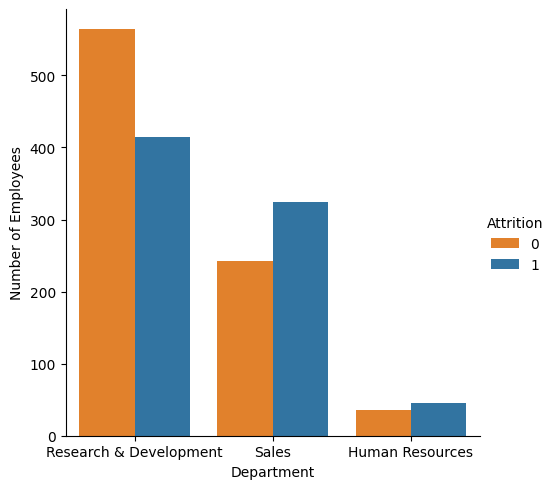

In [17]:
sns.axes_style('whitegrid')
sns.catplot(x="Department", data=train, aspect=1, kind='count', hue='Attrition', palette=['C1', 'C0']).set_ylabels('Number of Employees')

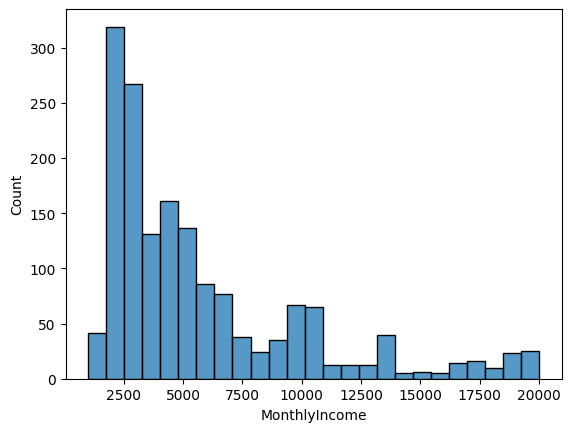

In [18]:
sns.histplot(train['MonthlyIncome']);

C:\Users\ADMIN\anaconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


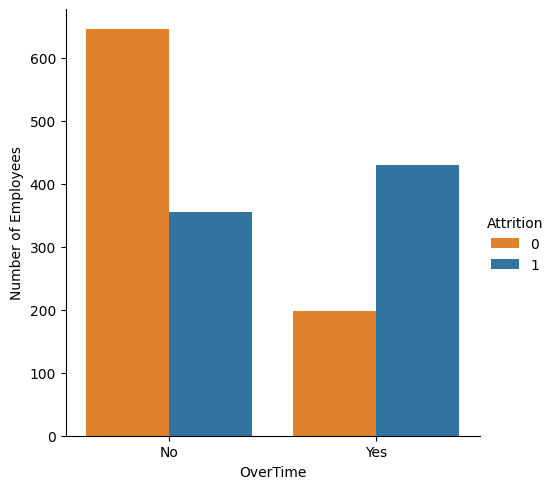

In [19]:
sns.axes_style('whitegrid')
sns.catplot(x="OverTime", data=train, aspect=1, kind='count', hue='Attrition', 
            palette=['C1', 'C0']).set_ylabels('Number of Employees')

C:\Users\ADMIN\anaconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

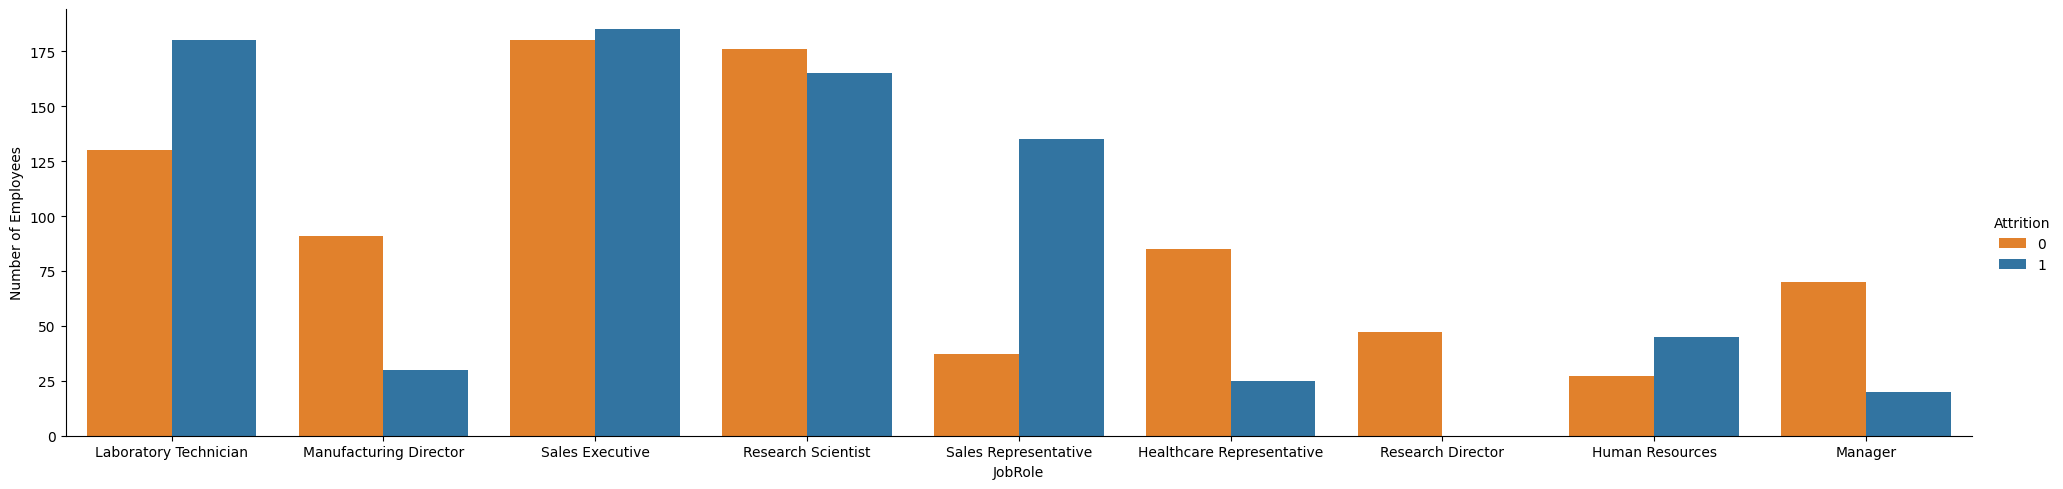

In [20]:
plt.figure(figsize=(8,6))
sns.axes_style('whitegrid')
sns.catplot(x="JobRole", data=train, aspect=4, kind='count', hue='Attrition',
            palette=['C1', 'C0']).set_ylabels('Number of Employees')

C:\Users\ADMIN\anaconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

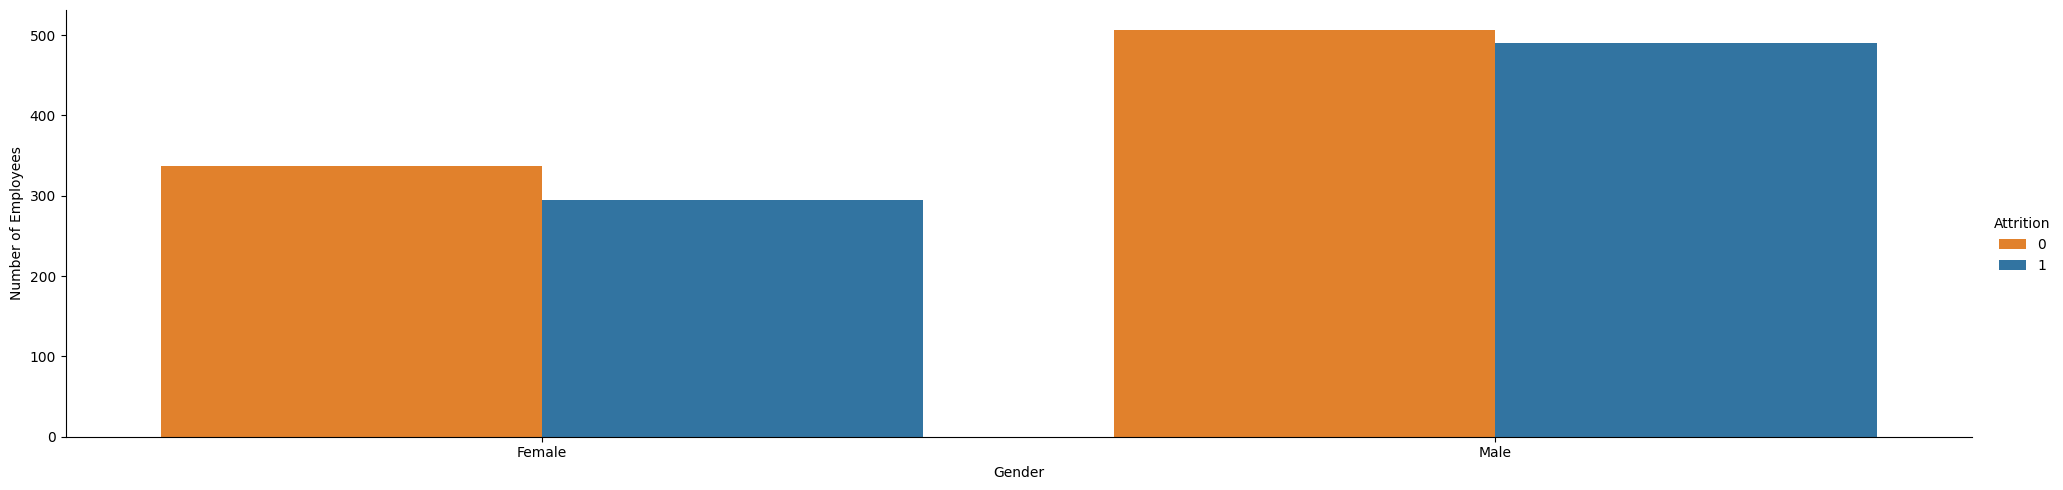

In [21]:
plt.figure(figsize=(8,6))
sns.axes_style('whitegrid')
sns.catplot(x="Gender", data=train, aspect=4, kind='count', hue='Attrition',
            palette=['C1', 'C0']).set_ylabels('Number of Employees');

C:\Users\ADMIN\anaconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

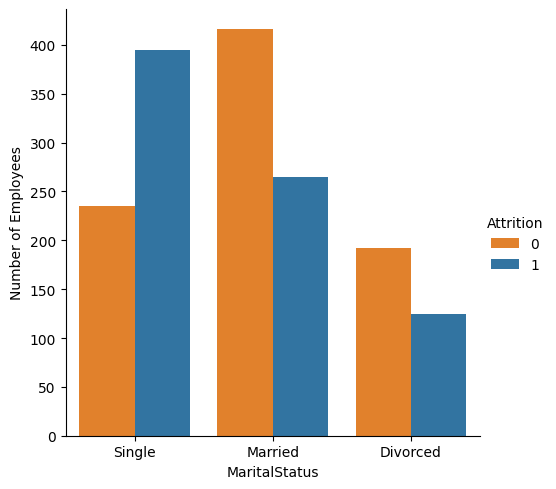

In [22]:
plt.figure(figsize=(8,6))
sns.axes_style('whitegrid')
sns.catplot(x="MaritalStatus", data=train, aspect=1, kind='count', hue='Attrition',
            palette=['C1', 'C0']).set_ylabels('Number of Employees')

C:\Users\ADMIN\anaconda3\envs\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


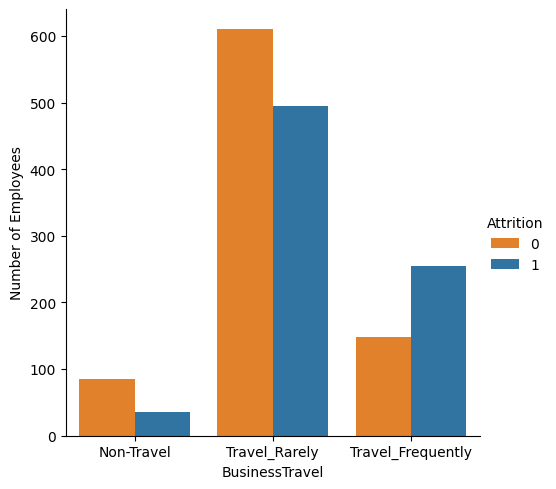

In [23]:
sns.axes_style('whitegrid')
sns.catplot(x="BusinessTravel", data=train, aspect=1, kind='count', hue='Attrition', 
            palette=['C1', 'C0']).set_ylabels('Number of Employees')

Text(0.5, 1.0, 'Attrition')

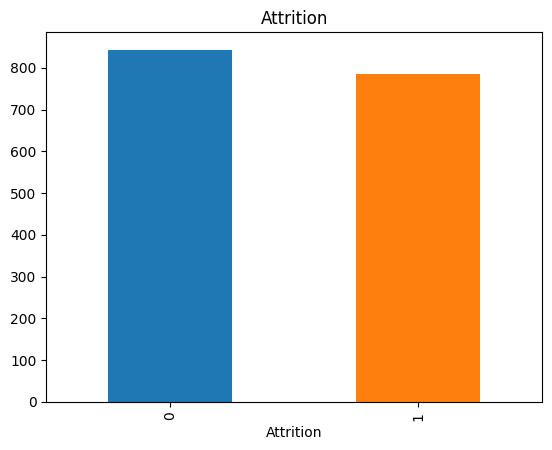

In [24]:
ytrain.value_counts().plot(kind='bar', color=('C0','C1')).set_title('Attrition')

<Axes: >

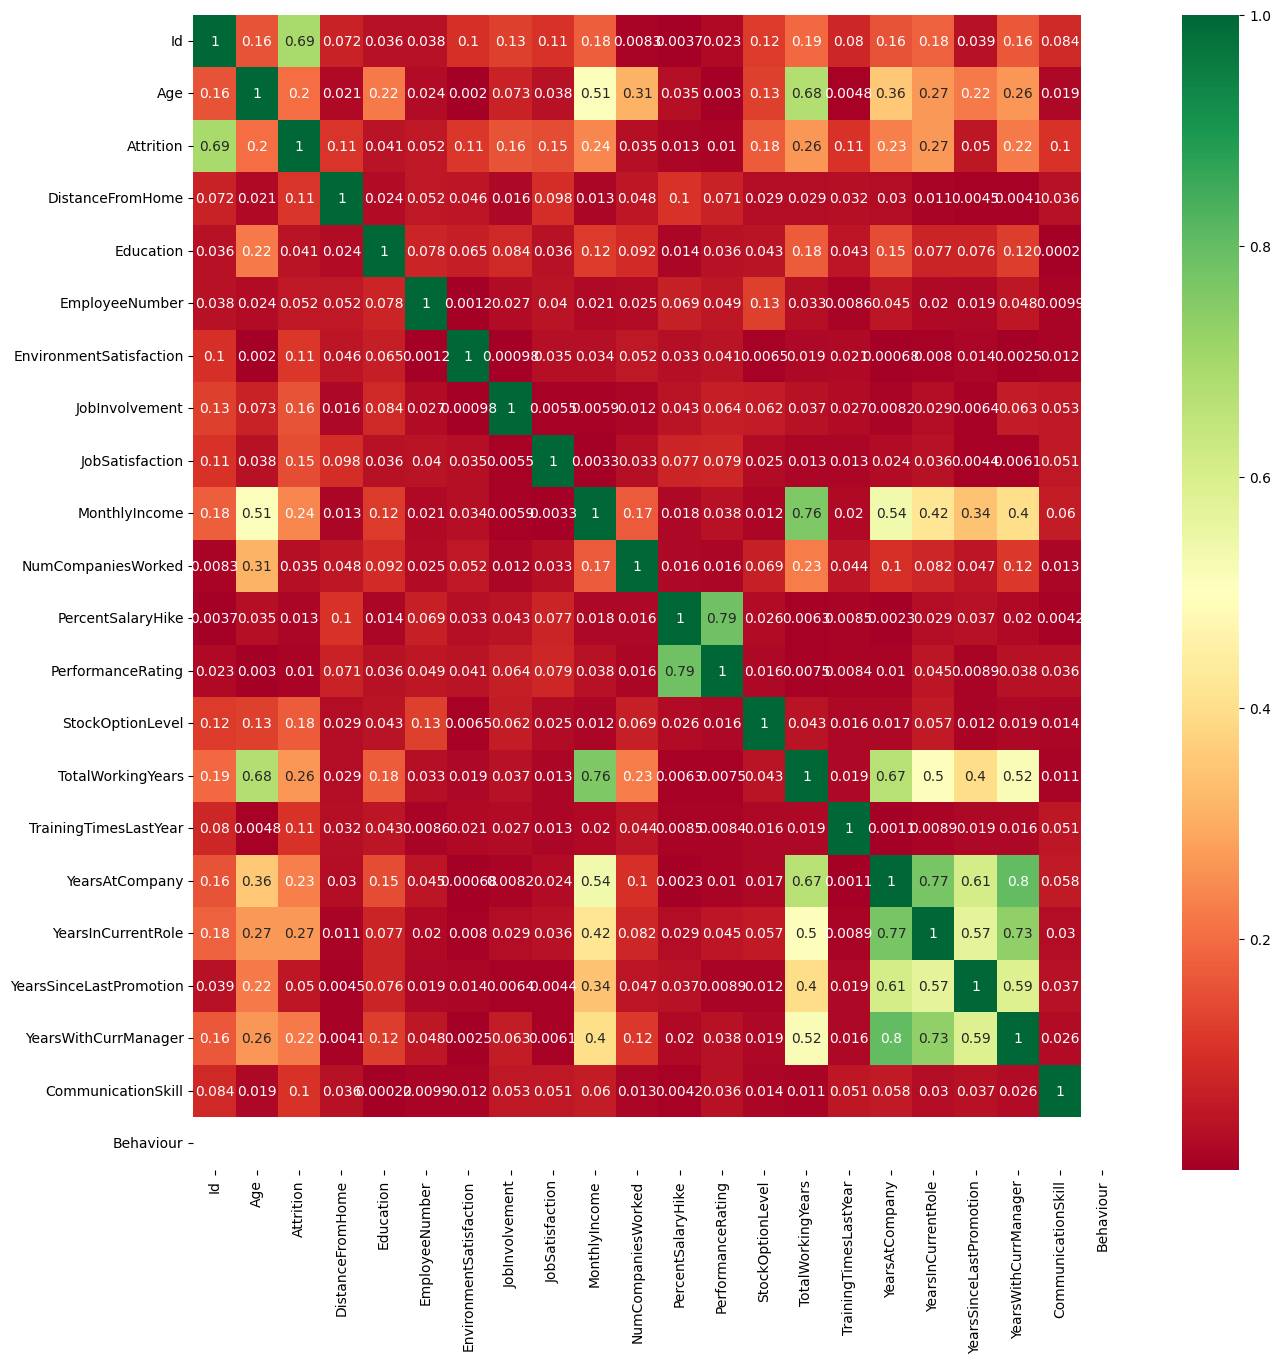

In [25]:
numeric_columns = train.select_dtypes(include='number')
corr = numeric_columns.corr().abs()

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="RdYlGn", annot_kws={"size": 10})


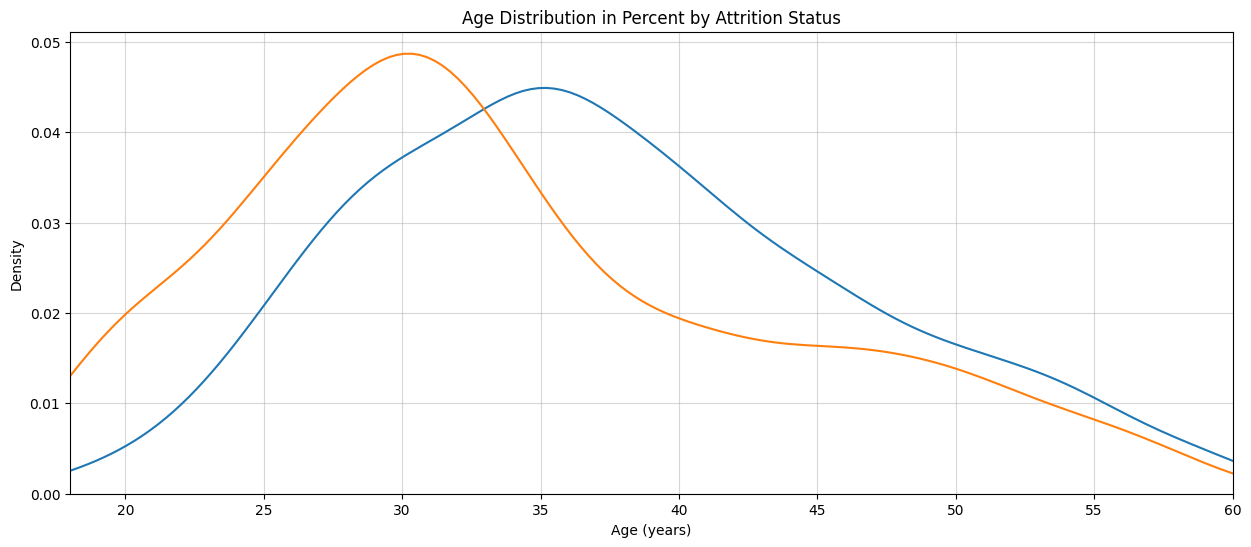

In [26]:
plt.figure(figsize=(15,6))
plt.grid(True,alpha=0.5)
sns.kdeplot(train.loc[train['Attrition'] == 0, 'Age'], label = 'Active Employee')
sns.kdeplot(train.loc[train['Attrition'] == 1, 'Age'], label = 'Ex-Employees')
plt.xlim(left=train.Age.min(), right=train.Age.max())
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status');

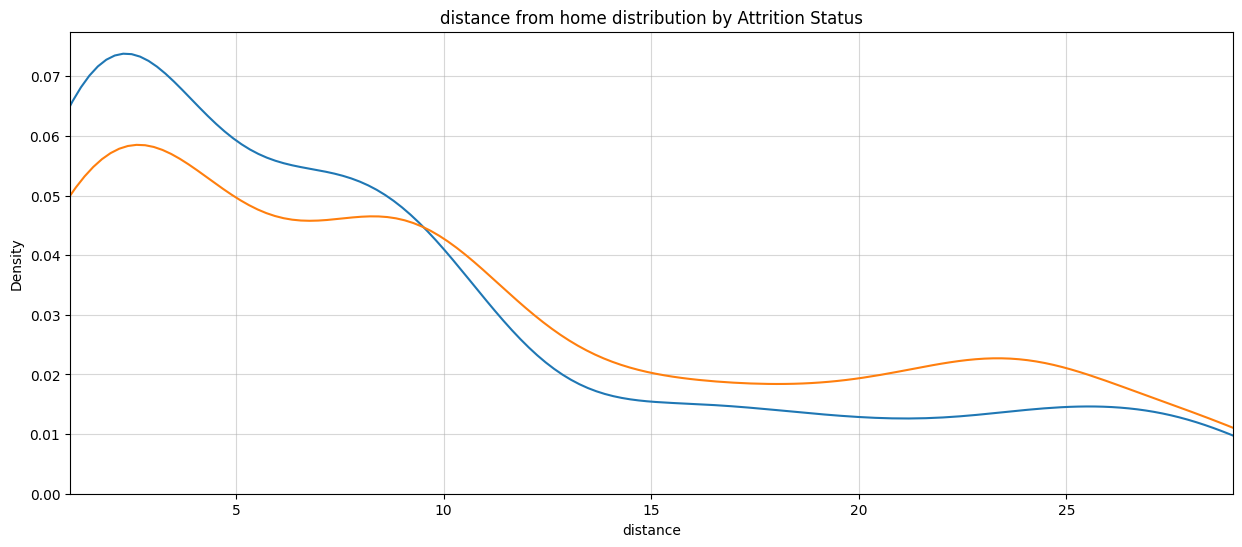

In [27]:
plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(train.loc[train['Attrition'] == 0, 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(train.loc[train['Attrition'] == 1, 'DistanceFromHome'], label = 'Ex-Employees')
plt.xlim(left=train['DistanceFromHome'].min(), right=train['DistanceFromHome'].max())
plt.xlabel('distance')
plt.ylabel('Density')
plt.title('distance from home distribution by Attrition Status');

# Splitting the full train data into train and validation set.

In [28]:
def column_index(train, query_cols):
    cols = train.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]
column_index(train, ['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager'])

array([ 1,  5, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

finding the index of the numerical columns in train data set so, I defined this function.

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(train.iloc[:,[ 1,  5, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26]]) 
train.iloc[:,[ 1,  5, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26]] = scaled_values

In [30]:
train.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,0.285714,0,Non-Travel,Research & Development,0.035714,3,Medical,571,3,...,0,0.000000,0.315789,0.333333,0.297297,0.388889,0.400000,0.411765,4,1
1,2,0.428571,0,Travel_Rarely,Research & Development,0.392857,4,Life Sciences,1614,3,...,0,0.666667,0.184211,0.333333,0.081081,0.111111,0.066667,0.058824,2,1
2,3,0.880952,1,Travel_Rarely,Sales,0.035714,1,Medical,842,3,...,0,0.000000,0.315789,0.500000,0.243243,0.388889,0.466667,0.176471,5,1
3,4,0.500000,0,Travel_Rarely,Research & Development,0.821429,1,Life Sciences,2014,1,...,0,0.000000,0.473684,0.333333,0.189189,0.388889,0.066667,0.411765,4,1
4,5,0.452381,0,Travel_Rarely,Research & Development,0.071429,3,Other,689,3,...,0,0.333333,0.263158,0.333333,0.270270,0.388889,0.466667,0.470588,1,1


In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
le_count = 0
for col in train.columns.values:
    if train[col].dtype == 'object':
        if len(list(train[col].unique())) <= 2:
            le.fit(train[col])
            train[col] = le.transform(train[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [33]:
train = pd.get_dummies(train, drop_first=True)  
print(train.shape)
train.head()

(1628, 43)


,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,0.285714,0,0.035714,3,571,3,0,3,4,...,False,True,False,False,False,False,False,False,False,True
1,2,0.428571,0,0.392857,4,1614,3,0,3,3,...,False,False,False,True,False,False,False,False,True,False
2,3,0.880952,1,0.035714,1,842,3,1,3,4,...,False,False,False,False,False,False,True,False,False,True
3,4,0.500000,0,0.821429,1,2014,1,1,3,4,...,False,False,False,False,False,True,False,False,False,True
4,5,0.452381,0,0.071429,3,689,3,1,3,3,...,False,False,False,True,False,False,False,False,True,False


In [34]:
column_index(test, ['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager'])

array([ 1,  4, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [35]:
scaled_values1 = scaler.fit_transform(test.iloc[:,[ 1,  4, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25]]) 
test.iloc[:,[ 1,  4, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25]] = scaled_values1

In [36]:
le_count = 0
for col in test.columns.values:
    if test[col].dtype == 'object':
        if len(list(test[col].unique())) <= 2:
            le.fit(test[col])
            test[col] = le.transform(test[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [37]:
test = pd.get_dummies(test, drop_first=True)  
print(test.shape)
test.head()

(470, 42)


,Id,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,0.238095,0.285714,3,377,4,1,3,4,0.051931,...,False,False,False,False,False,True,False,False,True,False
1,2,0.309524,0.178571,4,653,1,1,4,4,0.231753,...,False,False,False,False,False,False,True,False,False,False
2,3,0.452381,0.178571,3,474,3,1,4,1,0.259018,...,False,False,False,False,False,True,False,False,False,False
3,4,0.571429,0.000000,2,827,4,0,2,4,0.263686,...,False,False,False,True,False,False,False,False,True,False
4,5,0.642857,0.107143,2,972,3,1,3,2,0.178018,...,False,True,False,False,False,False,False,False,True,False


In [38]:
X = train.drop('Attrition',axis=1)
X['MonthlyIncome'] = np.cbrt(X['MonthlyIncome'])
X['TotalWorkingYears'] = np.cbrt(X['TotalWorkingYears'])
X['YearsAtCompany'] = np.cbrt(X['YearsAtCompany'])
X['YearsSinceLastPromotion'] = np.cbrt(X['YearsSinceLastPromotion'])
X['DistanceFromHome'] = np.cbrt(X['DistanceFromHome'])
Y = train['Attrition']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=1)

# Classification Techniques

In [39]:
rf = RandomForestClassifier(n_estimators=100, random_state = 0,max_features = 14)
rf.fit(X_train,Y_train)
print('For Random Forest Classifier')
score = roc_auc_score(Y_train, rf.predict_proba(X_train)[:,1])
print('Train roc_auc_score:',score)
score = roc_auc_score(Y_test, rf.predict_proba(X_test)[:,1])
print("Test roc_auc_score:",score)

For Random Forest Classifier
Train roc_auc_score: 1.0
Test roc_auc_score: 0.9810799959851451


In [40]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state = 0,learning_rate = 1,max_features=5)
gbc.fit(X_train,Y_train)
print('For Gradient Boost Classifier')
score = roc_auc_score(Y_train, gbc.predict_proba(X_train)[:,1])
print('Train roc_auc_score:',score)
score = roc_auc_score(Y_test, gbc.predict_proba(X_test)[:,1])
print("Test roc_auc_score:",score)

For Gradient Boost Classifier
Train roc_auc_score: 1.0
Test roc_auc_score: 0.9760781558432868


In [41]:
dtc = DecisionTreeClassifier(random_state = 0,max_features=24)
dtc.fit(X_train,Y_train)
print('For Decision Tree Classifier')
score = roc_auc_score(Y_train, dtc.predict_proba(X_train)[:,1])
print('Train roc_auc_score:',score)
score = roc_auc_score(Y_test, dtc.predict_proba(X_test)[:,1])
print("Test roc_auc_score:",score)

For Decision Tree Classifier
Train roc_auc_score: 1.0
Test roc_auc_score: 0.8510237880156579


In [42]:
svc = SVC(probability=True,kernel='rbf',C=0.1,gamma=0.001)
svc.fit(X_train,Y_train)
print('For Support Vector Classifier')
score = roc_auc_score(Y_train, svc.predict_proba(X_train)[:,1])
print('Train roc_auc_score:',score)
score = roc_auc_score(Y_test, svc.predict_proba(X_test)[:,1])
print("Test roc_auc_score:",score)

For Support Vector Classifier
Train roc_auc_score: 0.9971382125881562
Test roc_auc_score: 0.8952457425808825


In [43]:
log_reg = LogisticRegression(C = 1.8,max_iter=300,solver='liblinear',random_state=7) 
log_reg.fit(X_train,Y_train)
print('For Logistic Regression')
score = roc_auc_score(Y_train, log_reg.predict_proba(X_train)[:,1])
print('Train roc_auc_score:',score)
score = roc_auc_score(Y_test, log_reg.predict_proba(X_test)[:,1])
print("Test roc_auc_score:",score)

For Logistic Regression
Train roc_auc_score: 0.9464697410793204
Test roc_auc_score: 0.9601191073639131


In [44]:
from xgboost import XGBClassifier

xb =XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.4)
xb.fit(X_train,Y_train)
print('For xb Classifier')
score = roc_auc_score(Y_train, xb.predict_proba(X_train)[:,1])
print('Train roc_auc_score:',score)
score = roc_auc_score(Y_test, xb.predict_proba(X_test)[:,1])
print("Test roc_auc_score:",score)

For xb Classifier
Train roc_auc_score: 1.0
Test roc_auc_score: 0.979273311251631


In [45]:
models = [rf,gbc,dtc,svc,log_reg,xb]
for model in models:
    model.fit(X,Y)

In [46]:
new_test = test.copy()
for col in new_test.columns:
    if(isinstance(test[col][0],str)):
        new_test[col] = LabelEncoder().fit_transform(new_test[col])
new_test = new_test.drop(['Id','EmployeeNumber'],axis = 1)
X_test = new_test
X_test['MonthlyIncome'] = np.cbrt(X_test['MonthlyIncome'])
X_test['TotalWorkingYears'] = np.cbrt(X_test['TotalWorkingYears'])
X_test['YearsAtCompany'] = np.cbrt(X_test['YearsAtCompany'])
X_test['YearsSinceLastPromotion'] = np.cbrt(X_test['YearsSinceLastPromotion'])
X_test['DistanceFromHome'] = np.cbrt(X_test['DistanceFromHome'])

# Output Results

In [49]:
models = [rf,gbc,dtc,svc,log_reg,xb]
modelname = ['Random Forest','GradientBoost','DecisionTree','SupportVector','log_reg','xbclass10']
for model,name in zip(models,modelname):
    test_prob = model.predict_proba(test)[:,1]
    result = pd.DataFrame({'Id':list(test['Id']),'Attrition':list(test_prob)})
    result.to_csv('final_prediction_data.csv',index=False)

In [48]:
result

,Id,Attrition
0,1,0.000346
1,2,0.003885
2,3,0.004715
3,4,0.057694
4,5,0.006031
...,...,...
465,466,0.017652
466,467,0.997166
467,468,0.131377
468,469,0.000805
